#### Data Engineering Exercise 1: Pandas 
The Parking Citation Dataset is a puplic dataset collecting millions of records information about parking tickets for a county in California. We only selected a million of this data for us to work with in this assignment. You can see the whole dataset here: https://data.lacity.org/Transportation/Parking-Citations/wjz9-h9np/data

In this exercise we want you to Extract data, Transform and/or clean data, and then Save it as a new file. Steps are:

    1. Extract CSV and Json file and append these files into a Pandas DataFrame.
    2. Remove the spaces from column headers
    3. Change data types
    4. Check if a column has any digits in its values
    5. Write a function to check if a column only has "Alphabet" values
    6. Write a function to check if a column only has "Numberic" values
    7. Add a column "Distance_to_pointA", calculating the distance between each point and point A
    8. Handle duplicates
    9. Drop columns with 70% missing values
    10. Remove a few records based on a condition 
    11. Fill missing values for a column
    12. Split a column into severl coulmns 
    13. Extract the "Issue_year" of  "Issue_Date" column and save it as a new column "Issue_year" as an integer type.
    14. Save the final modified dataframe into a partitioned parquet file! If you are not able to save it as a parquet file, go ahead and save it as a csv file. 


Here are some resources that you may need: 

    Pandas =  https://pandas.pydata.org/docs/reference/general_functions.html
    Numpy = https://numpy.org/doc/stable/reference/index.html


Good luck! 


##### IMPORTS

In [3]:
import pandas as pd
import numpy as np

##### 1. Complete the below function to Extract CSV and Json file and Append these file to a Pandas DataFrame:
- csv file: parking_citation_sample.csv
- Json file: parking_citation_add.json

In [4]:
def extract_data():
    df_pandas = pd.DataFrame(
        columns=['Ticket number', 'Issue Date', 'Issue time', 'Meter Id', 'Marked Time',
       'RP State Plate', 'Plate Expiry Date', 'VIN', 'Make', 'Body Style',
       'Color', 'Location', 'Route', 'Agency', 'Violation code',
       'Violation Description', 'Fine amount', 'Latitude', 'Longitude',
       'Agency Description', 'Color Description', 'Body Style Description'])
    
    # read csv, drop the first column, and append it to pandas dataframe
    df_csv = pd.read_csv('parking_citation_sample.csv', header=0, low_memory=False)
    df_csv = df_csv.iloc[: , 1:]
    df_pandas = df_pandas.append(df_csv)
    
    # read and append json
    df_json = pd.read_json('parking_citation_add.json')
    df_json = df_json.iloc[: , 1:]
    df_pandas = df_pandas.append(df_json)
    
    df_pandas = df_pandas.replace('', np.nan)
        
    return df_pandas

df_pandas = extract_data()
print('Shape of Data: '+ str(df_pandas.shape))

Shape of Data: (1000003, 22)


In [5]:
df_pandas.head()

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,...,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Agency Description,Color Description,Body Style Description
0,1103341116,12/21/2015,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,...,1521,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,NaN,NaN,NaN
1,1103700150,12/21/2015,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,...,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,NaN,NaN,NaN
2,1104803000,12/21/2015,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,...,2R2,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4,NaN,NaN,NaN
3,1104820732,12/26/2015,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,...,2F11,2.0,0,17104h,NaN,6440041.1,1802686.2,NaN,NaN,NaN
4,1105461453,9/15/2015,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,...,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0,NaN,NaN,NaN


##### 2. Remove the spaces from column headers and replace it with underline:

In [6]:
df_pandas.columns = df_pandas.columns.str.replace(" ", "_")


In [7]:
df_pandas.columns

Index(['Ticket_number', 'Issue_Date', 'Issue_time', 'Meter_Id', 'Marked_Time',
       'RP_State_Plate', 'Plate_Expiry_Date', 'VIN', 'Make', 'Body_Style',
       'Color', 'Location', 'Route', 'Agency', 'Violation_code',
       'Violation_Description', 'Fine_amount', 'Latitude', 'Longitude',
       'Agency_Description', 'Color_Description', 'Body_Style_Description'],
      dtype='object')

##### 3. Change data types for (Ticket_number, Issue_Date ) columns into (string, datetime) respectively 

In [8]:
df_pandas['Ticket_number'] = df_pandas['Ticket_number'].astype('string')

In [9]:
df_pandas['Issue_Date'] = pd.to_datetime(df_pandas['Issue_Date'])

In [10]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000003 entries, 0 to 29
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   Ticket_number           1000003 non-null  string        
 1   Issue_Date              999933 non-null   datetime64[ns]
 2   Issue_time              999642 non-null   float64       
 3   Meter_Id                268020 non-null   object        
 4   Marked_Time             37661 non-null    float64       
 5   RP_State_Plate          999928 non-null   object        
 6   Plate_Expiry_Date       912248 non-null   float64       
 7   VIN                     16309 non-null    object        
 8   Make                    998775 non-null   object        
 9   Body_Style              998673 non-null   object        
 10  Color                   999355 non-null   object        
 11  Location                999886 non-null   object        
 12  Route              

##### 4. Check if a column has any digits in its values. Return the rows where this is true. Check for column "Violation_Description". 
e.g. 17104h --> True,     WHITE CURB --> False

In [11]:
my_col = 'Violation_Description'

def has_digit(df, my_col):

    series = df[my_col].str.contains('\\d', regex=True)

    result = df.loc[series == True]

    return result[my_col]

has_digit(df_pandas, my_col)

3                    17104h
31          NO PK BET 1-3AM
37                   22502A
39                   22502A
63                   17104h
                ...        
999801    18 IN. CURB/1 WAY
999809    18 IN. CURB/1 WAY
999855    18 IN. CURB/2 WAY
3                    17104h
27                     5204
Name: Violation_Description, Length: 27550, dtype: object

##### 5. Write a function to check if a column only has "Alphabet" values, return the rows where this is not true. Check for "Make" column. 

In [12]:
my_col = 'Make'

def only_alpha(df, my_col):

        series = df[my_col].str.isalpha()
        result = df.loc[series == False]
        return result[my_col]

only_alpha(df_pandas, my_col)

467909    A4
Name: Make, dtype: object

##### 6. Write a function to check if a column only has "Numberic" values, return the rows where this is not true. Check for TicketNumber column. 

In [13]:
my_col = 'Ticket_number'

def only_number(df, my_col):
    series = df[my_col].str.isdecimal()
    result = df.loc[series == False]
    return result[my_col]    
     

only_number(df_pandas, my_col)

456378    1107495524D
456379    1107495535D
456380    1107495546D
456382    1107502524D
456383    1107503106D
456384    1107503110D
887536    1046703641D
889238    1107495550D
889239    1107496121D
889240    1107496132D
889241    1107496143D
889246    1107502056D
889247    1107502060D
889248    1107502071D
889249    1107502082D
889250    1107502093D
889251    1107502104D
889252    1107502115D
889253    1107502126D
889255    1107502141D
889256    1107502152D
889257    1107502163D
889258    1107502174D
889259    1107502185D
889260    1107502196D
889261    1107502200D
889262    1107502211D
889263    1107502222D
889264    1107502244D
889265    1107503121D
889266    1107503132D
889267    1107503154D
889268    1107503165D
889270    1107504171D
889271    1107504182D
889272    1107504241D
889273    1107504366D
889275    1107506422D
889276    1107506433D
889277    1107506444D
889278    1107506455D
889279    1107506466D
889280    1107506470D
889281    1107507660D
889282    1107507671D
889283    

##### 7. Add a column "Distance_to_pointA", collecting the distance between each point and the point A: Ya= 6439997, Xa= 1802686. 
Drop rows with either Nan or values like 99999. 

Note: Parking citations with latitude / longitude (XY) in US Feet coordinates according to the NAD_1983_StatePlane_California_V_FIPS_0405_Feet projection.

In [14]:
df_pandas['Latitude'].isna().sum(), df_pandas['Longitude'].isna().sum()

(0, 0)

In [15]:
# drop rows with values like 99999 in Latitude and/or Longitude

df_pandas = df_pandas.loc[(df_pandas.Latitude >= 100000) & (df_pandas.Longitude >= 100000)]

In [16]:
# calculate distance between all rows(Longitude/Latitude) and point A (6439997,1802686)

latA = 6439997
lonA = 1802686

df_pandas.loc[:,'Distance_to_pointA'] = np.sqrt((df_pandas.loc[:,'Latitude'] - latA)**2 \
+ (df_pandas.loc[:,'Longitude'] - lonA)**2)



In [17]:
df_pandas.shape

(749980, 23)

In [18]:
df_pandas.head()

,Ticket_number,Issue_Date,Issue_time,Meter_Id,Marked_Time,RP_State_Plate,Plate_Expiry_Date,VIN,Make,Body_Style,...,Agency,Violation_code,Violation_Description,Fine_amount,Latitude,Longitude,Agency_Description,Color_Description,Body_Style_Description,Distance_to_pointA
2,1104803000,2015-12-21,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,...,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4,NaN,NaN,NaN,0.984886
3,1104820732,2015-12-26,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,...,2.0,0,17104h,NaN,6440041.1,1802686.2,NaN,NaN,NaN,44.100454
6,1108321723,2015-12-21,1041.0,NaN,NaN,CA,201610.0,NaN,HOND,PA,...,1.0,8.06E+07,RED ZONE,93.0,6451860.6,1890192.1,NaN,NaN,NaN,88306.639287
15,1109139006,2015-12-19,1550.0,NaN,NaN,CA,201608.0,NaN,HOND,NaN,...,1.0,225078A,HANDICAP/NO DP ID,363.0,6429130.8,1880027.3,NaN,NaN,NaN,78100.902608
16,1109455266,2015-12-26,1815.0,NaN,NaN,NY,NaN,NaN,TOYO,PA,...,36.0,8603,PK IN PROH AREA,68.0,6467477.1,1868721.0,NaN,NaN,NaN,71524.660929


##### 8. Is there any duplicates in dataframe? If yes, print them and then drop them.

In [19]:
duplicate_Rows = df_pandas[df_pandas.duplicated()]
duplicate_Rows

,Ticket_number,Issue_Date,Issue_time,Meter_Id,Marked_Time,RP_State_Plate,Plate_Expiry_Date,VIN,Make,Body_Style,...,Agency,Violation_code,Violation_Description,Fine_amount,Latitude,Longitude,Agency_Description,Color_Description,Body_Style_Description,Distance_to_pointA
2,1104803000,2015-12-21,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,...,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4,NaN,NaN,NaN,0.984886
3,1104820732,2015-12-26,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,...,2.0,0,17104h,NaN,6440041.1,1802686.2,NaN,NaN,NaN,44.100454


In [20]:
df_pandas = df_pandas.drop(duplicate_Rows.index)

In [21]:
df_pandas.shape

(749976, 23)

##### 9. Find the columns with more than 70% missing values, print them, and then drop them.

In [22]:
# Find the columns with more than 70% missing values

def get_percentage_missing(series):

    num = series.isnull().sum()
    den = len(series)
    return round(num/den, 2)

get_percentage_missing(df_pandas)

Ticket_number             0.00
Issue_Date                0.00
Issue_time                0.00
Meter_Id                  0.67
Marked_Time               0.96
RP_State_Plate            0.00
Plate_Expiry_Date         0.09
VIN                       0.98
Make                      0.00
Body_Style                0.00
Color                     0.00
Location                  0.00
Route                     0.00
Agency                    0.00
Violation_code            0.00
Violation_Description     0.00
Fine_amount               0.00
Latitude                  0.00
Longitude                 0.00
Agency_Description        1.00
Color_Description         1.00
Body_Style_Description    1.00
Distance_to_pointA        0.00
dtype: float64

In [23]:
# Drop columns with more than 70% missing values 

df_pandas = df_pandas.loc[:, df_pandas.isnull().mean() <= .70]
get_percentage_missing(df_pandas)

Ticket_number            0.00
Issue_Date               0.00
Issue_time               0.00
Meter_Id                 0.67
RP_State_Plate           0.00
Plate_Expiry_Date        0.09
Make                     0.00
Body_Style               0.00
Color                    0.00
Location                 0.00
Route                    0.00
Agency                   0.00
Violation_code           0.00
Violation_Description    0.00
Fine_amount              0.00
Latitude                 0.00
Longitude                0.00
Distance_to_pointA       0.00
dtype: float64

In [24]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749976 entries, 6 to 999972
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Ticket_number          749976 non-null  string        
 1   Issue_Date             749976 non-null  datetime64[ns]
 2   Issue_time             749840 non-null  float64       
 3   Meter_Id               248690 non-null  object        
 4   RP_State_Plate         749912 non-null  object        
 5   Plate_Expiry_Date      682669 non-null  float64       
 6   Make                   749467 non-null  object        
 7   Body_Style             749524 non-null  object        
 8   Color                  749743 non-null  object        
 9   Location               749976 non-null  object        
 10  Route                  746341 non-null  object        
 11  Agency                 749976 non-null  float64       
 12  Violation_code         749976 non-null  obje

##### 10. Find RP_State_Plates that are not for US, then drop their data.

In [25]:
# To find the US state abbrevation, you can use State_Abbreviation.xlsx' dataset
len(df_pandas['RP_State_Plate'].unique())

75

In [26]:
state_abbv_df = pd.read_excel('State_Abbreviation.xlsx')
state_abbv_df.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [27]:
abbv_list = state_abbv_df['Abbreviation'].tolist()
df_pandas = (df_pandas[df_pandas['RP_State_Plate'].isin(abbv_list)])

In [28]:
len(df_pandas['RP_State_Plate'].unique())

50

In [29]:
df_pandas.shape

(748312, 18)

##### 11. Almost 4% of Fine_Amount column has missing values, handle these missing values. 

In [30]:
series = df_pandas.Fine_amount.isna()
df_nofine = df_pandas.loc[series == True]
df_nofine.Fine_amount.isna().sum()

358

In [31]:
codes = df_nofine.Violation_code.value_counts().index.to_list()
codes

['0', '80.69.2', '80.71.3', '8069BS']

In [32]:
for code in codes:
    print('Violation Code ', code)
    print('------')
    print(df_pandas.loc[df_pandas.Violation_code == code].Fine_amount.value_counts())
    print('--------------------')

Violation Code  0
------
93.0    17
25.0     2
Name: Fine_amount, dtype: int64
--------------------
Violation Code  80.69.2
------
78.0     1325
133.0     656
103.0     439
Name: Fine_amount, dtype: int64
--------------------
Violation Code  80.71.3
------
68.0     192
93.0      32
143.0     19
Name: Fine_amount, dtype: int64
--------------------
Violation Code  8069BS
------
73.0    9483
68.0       1
Name: Fine_amount, dtype: int64
--------------------


In [33]:
code_fine_dict = {}
for code in codes:
    fines = df_pandas.loc[df_pandas.Violation_code == code,:].Fine_amount.value_counts().index.to_list()
    avg_fine = sum(fines) / len(fines)
    code_fine_dict[code] = round(avg_fine, 2)

code_fine_dict

{'0': 59.0, '80.69.2': 104.67, '80.71.3': 101.33, '8069BS': 70.5}

In [34]:
for key, value in code_fine_dict.items():
    df_nofine.loc[df_nofine.Violation_code == key, 'Fine_amount'] = value

C:\Users\jesus.baquiax\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [35]:
df_pandas.loc[df_pandas.Fine_amount.isna(), 'Fine_amount'] = df_nofine.loc[:, 'Fine_amount']

In [36]:
# Use your knowledge to handle the missing values, you need to impute values based on useful information of other columns 
df_pandas.isna().sum()

Ticket_number                 0
Issue_Date                    0
Issue_time                  136
Meter_Id                 500421
RP_State_Plate                0
Plate_Expiry_Date         66385
Make                        506
Body_Style                  448
Color                       233
Location                      0
Route                      3626
Agency                        0
Violation_code                0
Violation_Description        30
Fine_amount                   0
Latitude                      0
Longitude                     0
Distance_to_pointA            0
dtype: int64

##### 12. Split the "Location" column into new columns using SPACE as delimiter. You may need to write a function. The final splitted data should be structured like below (the number of columns may be different):
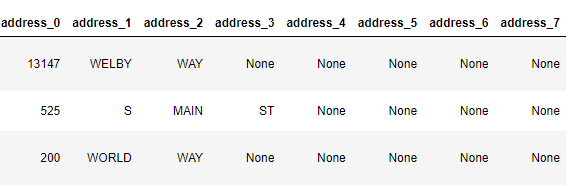

In [37]:
def address_sep(df):
    
    split_df = df['Location'].str.split(' ', expand=True)
    
    for x in split_df.columns:
        split_df.rename(columns = {x : "address_"+str(x)}, inplace=True)
        
    col_list = list(split_df.columns)
    
    df_pandas[col_list] = df_pandas['Location'].str.split(' ', expand=True)
    
    return df_pandas

address_sep(df_pandas)

,Ticket_number,Issue_Date,Issue_time,Meter_Id,RP_State_Plate,Plate_Expiry_Date,Make,Body_Style,Color,Location,...,Longitude,Distance_to_pointA,address_0,address_1,address_2,address_3,address_4,address_5,address_6,address_7
6,1108321723,2015-12-21,1041.0,NaN,CA,201610.0,HOND,PA,BK,10635 FRIAR ST,...,1890192.1,88306.639287,10635,FRIAR,ST,None,None,None,None,None
15,1109139006,2015-12-19,1550.0,NaN,CA,201608.0,HOND,NaN,GO,14006 RIVERSIDE DR,...,1880027.3,78100.902608,14006,RIVERSIDE,DR,None,None,None,None,None
16,1109455266,2015-12-26,1815.0,NaN,NY,NaN,TOYO,PA,WH,3200 CANYON DR,...,1868721.0,71524.660929,3200,CANYON,DR,None,None,None,None,None
17,1109455270,2015-12-27,1815.0,NaN,CA,201603.0,INFI,PA,GY,3200 CANYON DR,...,1868721.0,71524.660929,3200,CANYON,DR,None,None,None,None,None
18,1109455745,2015-12-23,2140.0,NaN,CA,201512.0,TOYO,TR,BL,835 N ACADEMY RD,...,1851321.5,69935.016471,835,N,ACADEMY,RD,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999966,4250683662,2015-01-13,1605.0,NaN,CA,201410.0,HOND,PA,BK,4401 W 1ST ST,...,1849355.7,54833.860589,4401,W,1ST,ST,None,None,None,None
999967,4250683673,2015-01-13,1608.0,NaN,CA,201411.0,CHEV,PA,WT,4313 W 1ST ST,...,1849355.8,55000.022331,4313,W,1ST,ST,None,None,None,None
999968,4250683684,2015-01-14,805.0,NaN,CA,201407.0,MERZ,PA,BK,2234 ADAMS BLVD W,...,1834419.2,41005.644154,2234,ADAMS,BLVD,W,None,None,None,None
999970,4250683706,2015-01-14,1046.0,NaN,CA,201405.0,GMC,TK,BL,1827 106TH ST E,...,1800576.4,48874.050624,1827,106TH,ST,E,None,None,None,None


##### 13. Extract the "Issue_year" of  "Issue_Date" column and save it as a new column "Issue_year" as an integer type.

In [38]:
df_pandas['Issue_year'] = df_pandas['Issue_Date'].dt.year

In [39]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748312 entries, 6 to 999972
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Ticket_number          748312 non-null  string        
 1   Issue_Date             748312 non-null  datetime64[ns]
 2   Issue_time             748176 non-null  float64       
 3   Meter_Id               247891 non-null  object        
 4   RP_State_Plate         748312 non-null  object        
 5   Plate_Expiry_Date      681927 non-null  float64       
 6   Make                   747806 non-null  object        
 7   Body_Style             747864 non-null  object        
 8   Color                  748079 non-null  object        
 9   Location               748312 non-null  object        
 10  Route                  744686 non-null  object        
 11  Agency                 748312 non-null  float64       
 12  Violation_code         748312 non-null  obje

In [40]:
df_pandas.shape

(748312, 27)

##### 14. Write the pandas dataframe into a Parquet file (cleaned_parking_citations) partition by "Year" column. 

In [41]:
df_pandas.to_parquet('df_pandas.parquet.gzip', compression='gzip', partition_cols='Issue_year')